# **Dataset - HR Data MNC (Regressão)**

O objetivo do grupo ao analisar esse dataset é, por meio dos dados de Recursos Humanos de uma multinacional, descobrir qual o salário dos funcionários.

## **1. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura do arquivo (dataset) a ser analisado pelo grupo, além da criação do dataframe.

#### Imports Python

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura do Dataset

In [2]:
df_salario = pd.read_csv('Salario/HR_Data_MNC_Data Science Lovers.csv', encoding='latin1')
df_final = df_salario # dataframe para utilizar em pré processamento e predições

In [3]:
df_salario.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


## **2. Análise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna.

In [4]:
df_salario.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          2000000 non-null  int64 
 1   Employee_ID         2000000 non-null  object
 2   Full_Name           2000000 non-null  object
 3   Department          2000000 non-null  object
 4   Job_Title           2000000 non-null  object
 5   Hire_Date           2000000 non-null  object
 6   Location            2000000 non-null  object
 7   Performance_Rating  2000000 non-null  int64 
 8   Experience_Years    2000000 non-null  int64 
 9   Status              2000000 non-null  object
 10  Work_Mode           2000000 non-null  object
 11  Salary_INR          2000000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [5]:
df_salario.describe(include='all')

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
count,2.000000e+06,2000000,2000000,2000000,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2000000,2000000,2.000000e+06
unique,NaN,2000000,467487,7,29,5479,1593497,NaN,NaN,4,2,NaN
top,NaN,EMP0000001,Michael Smith,IT,Software Engineer,2022-10-31,"Lake Michael, Congo",NaN,NaN,Active,On-site,NaN
freq,NaN,1,1014,601042,300358,622,20,NaN,NaN,1401558,1199109,NaN
mean,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000148e+00,5.010287e+00,NaN,NaN,8.968878e+05
std,5.773504e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.413973e+00,3.608823e+00,NaN,NaN,4.026103e+05
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,3.000000e+05
25%,4.999998e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,2.000000e+00,NaN,NaN,6.163460e+05
50%,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,5.000000e+00,NaN,NaN,8.110265e+05
75%,1.499999e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,8.000000e+00,NaN,NaN,1.073745e+06


A primeira grande observação do grupo foi referente a coluna 'Unnamed: 0', a qual posuia a mesma função de um index. Portanto o grupo pretende removê-la durante o Pré Processamento (removida agora em um dataframe da EDA para evitar possíveis erros nesta etapa).

In [6]:
df_salario = df_salario.drop(columns='Unnamed: 0')

Após remoção, o grupo optou por checar a distribuição de funcionários por área nesse dataset.

<Axes: xlabel='Department', ylabel='Count'>

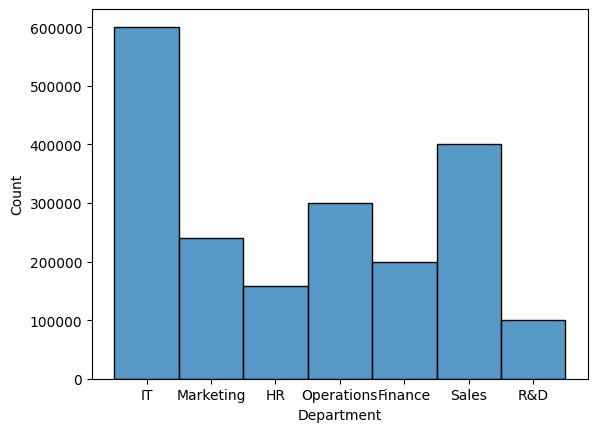

In [7]:
import seaborn as sns
sns.histplot(data=df_salario, x="Department")

Dando segmento na EDA, o grupo optou por executar um conjunto de histogramas para visualizar a distribuição dos dados entre as diferentes features numéricas. É possível observar que a performance está perfeitamente distribuída, enquanto o salário apresenta uma distribuição ruim.

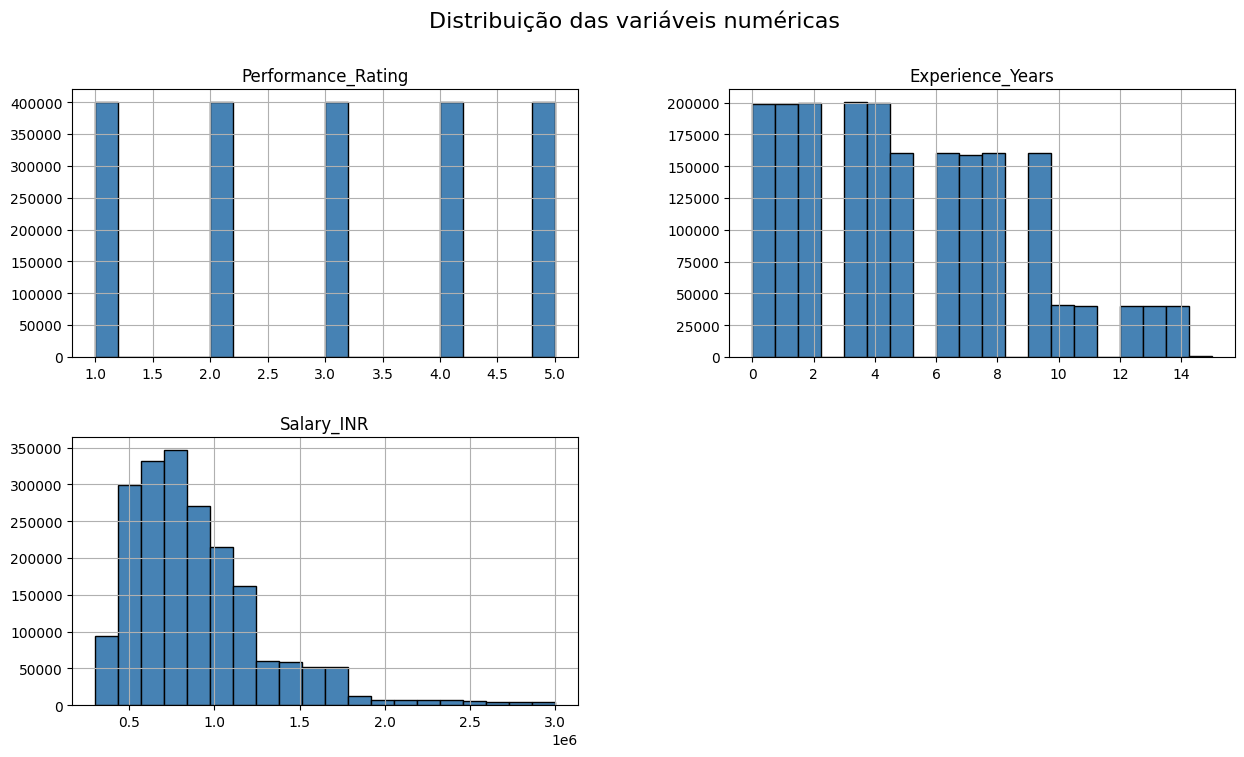

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_salario.hist(bins=20, figsize=(15, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()


Para entender a concentração dos dados mal distribuídos do salário, o grupo optou por realizar um boxplot, de forma a observar o percentual de valores discrepantes.

<Axes: >

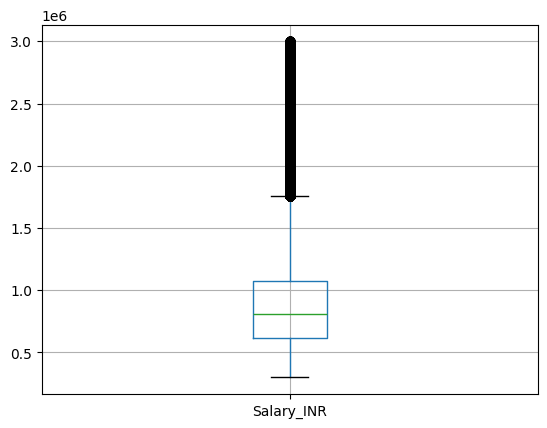

In [9]:
df_salario.boxplot(column='Salary_INR')

Após realização do boxplot, o grupo optou por reduzir o dataframe em 10% pra cima e 10% p baixo, de forma a tentar excluir o excesso de outliers. É possível ver que após a remoção os Outliers não são mais identificados. - *Eu (Leo) acho que 10% é muito, mas considerando a qtd de dados acho reasonable até. Mas quero checar o fabricio.*

<Axes: >

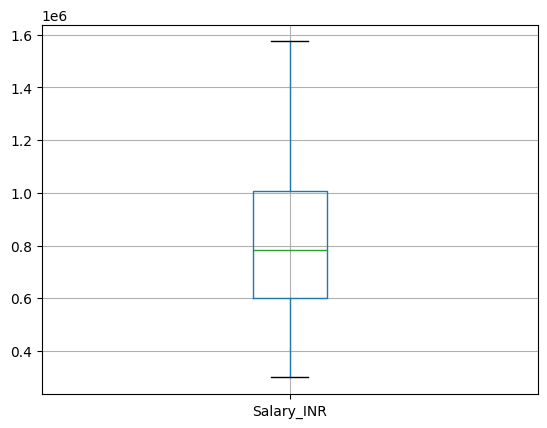

In [10]:
q_alto = 0.93

limite_alto = df_salario['Salary_INR'].quantile(q_alto)

df_podado = df_salario[
    (df_salario['Salary_INR'] <= limite_alto)
]

df_podado.boxplot(column='Salary_INR')

Checar se fazemos algo ou não

<Axes: xlabel='Department', ylabel='Count'>

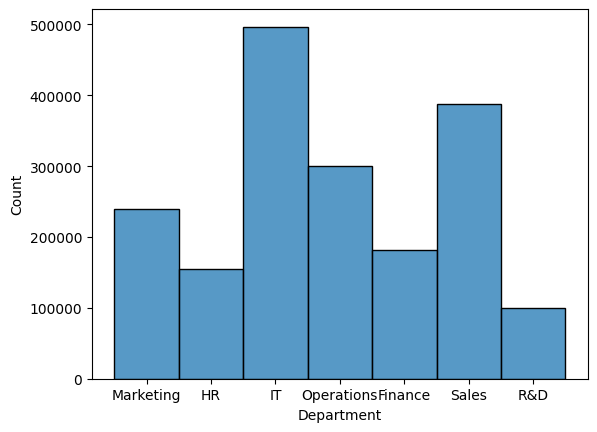

In [11]:
sns.histplot(data=df_podado, x="Department")

In [12]:
df_corr = df_podado.copy()

In [13]:
df_corr['Work_Mode'].unique()

array(['On-site', 'Remote'], dtype=object)

In [14]:
mapeamento_work_mode = {'Remote': 0, 'On-site': 1}
df_corr['WorkMode_Num'] = df_corr['Work_Mode'].map(mapeamento_work_mode)

In [15]:
mapeamento_status = {'Resigned': 0, 'Active': 1, 'Terminated': 2, 'Retired': 3}
df_corr['Status_Num'] = df_corr['Status'].map(mapeamento_status)

In [16]:
df_corr.corr(numeric_only=True).style.background_gradient(cmap= 'Blues')

,Performance_Rating,Experience_Years,Salary_INR,WorkMode_Num,Status_Num
Performance_Rating,1.000000,-0.000222,0.000025,-0.000214,-0.000270
Experience_Years,-0.000222,1.000000,0.000976,-0.000322,0.000565
Salary_INR,0.000025,0.000976,1.000000,-0.000059,-0.001745
WorkMode_Num,-0.000214,-0.000322,-0.000059,1.000000,0.000648
Status_Num,-0.000270,0.000565,-0.001745,0.000648,1.000000


Para complementar a análise de correlação, o grupo realizou um gráfico de disperção com todas as classes do dataset, para tentar observar de forma gráfica onde os valores se encontram e como se correlacionam entre diferentes classes (a linha foi comentada para reduzir o tempo de execução do programa. O resultado está na pasta Salario, arquivo DispersaoSalario.png).

In [35]:
df_splot = df_corr[['Performance_Rating', 'Experience_Years', 'Salary_INR',	'WorkMode_Num',	'Status_Num', 'Department' , 'Location']]
#sns.pairplot(df_splot, hue='Department', height=3.5, diag_kind='hist')

Seguindo com a EDA e com base nos resultados obtidos por meio do gráfico de dispersão, o grupo optou por realizar um histograma e o boxplot para enxergar a dispersão salarial com base nas áreas. É possível perceber que IT e Finance possuem os funcionários com a maior faixa salarial da empresa.

<Axes: xlabel='Salary_INR', ylabel='Count'>

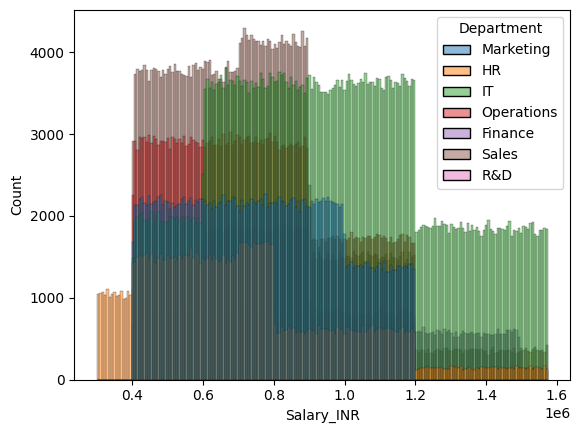

In [18]:
sns.histplot(data=df_splot, x="Salary_INR", hue="Department")

Para obter uma visualização limpa da dispersão salarial em cada área, foi gerado múltiplos histogramas, um para cada departamento.

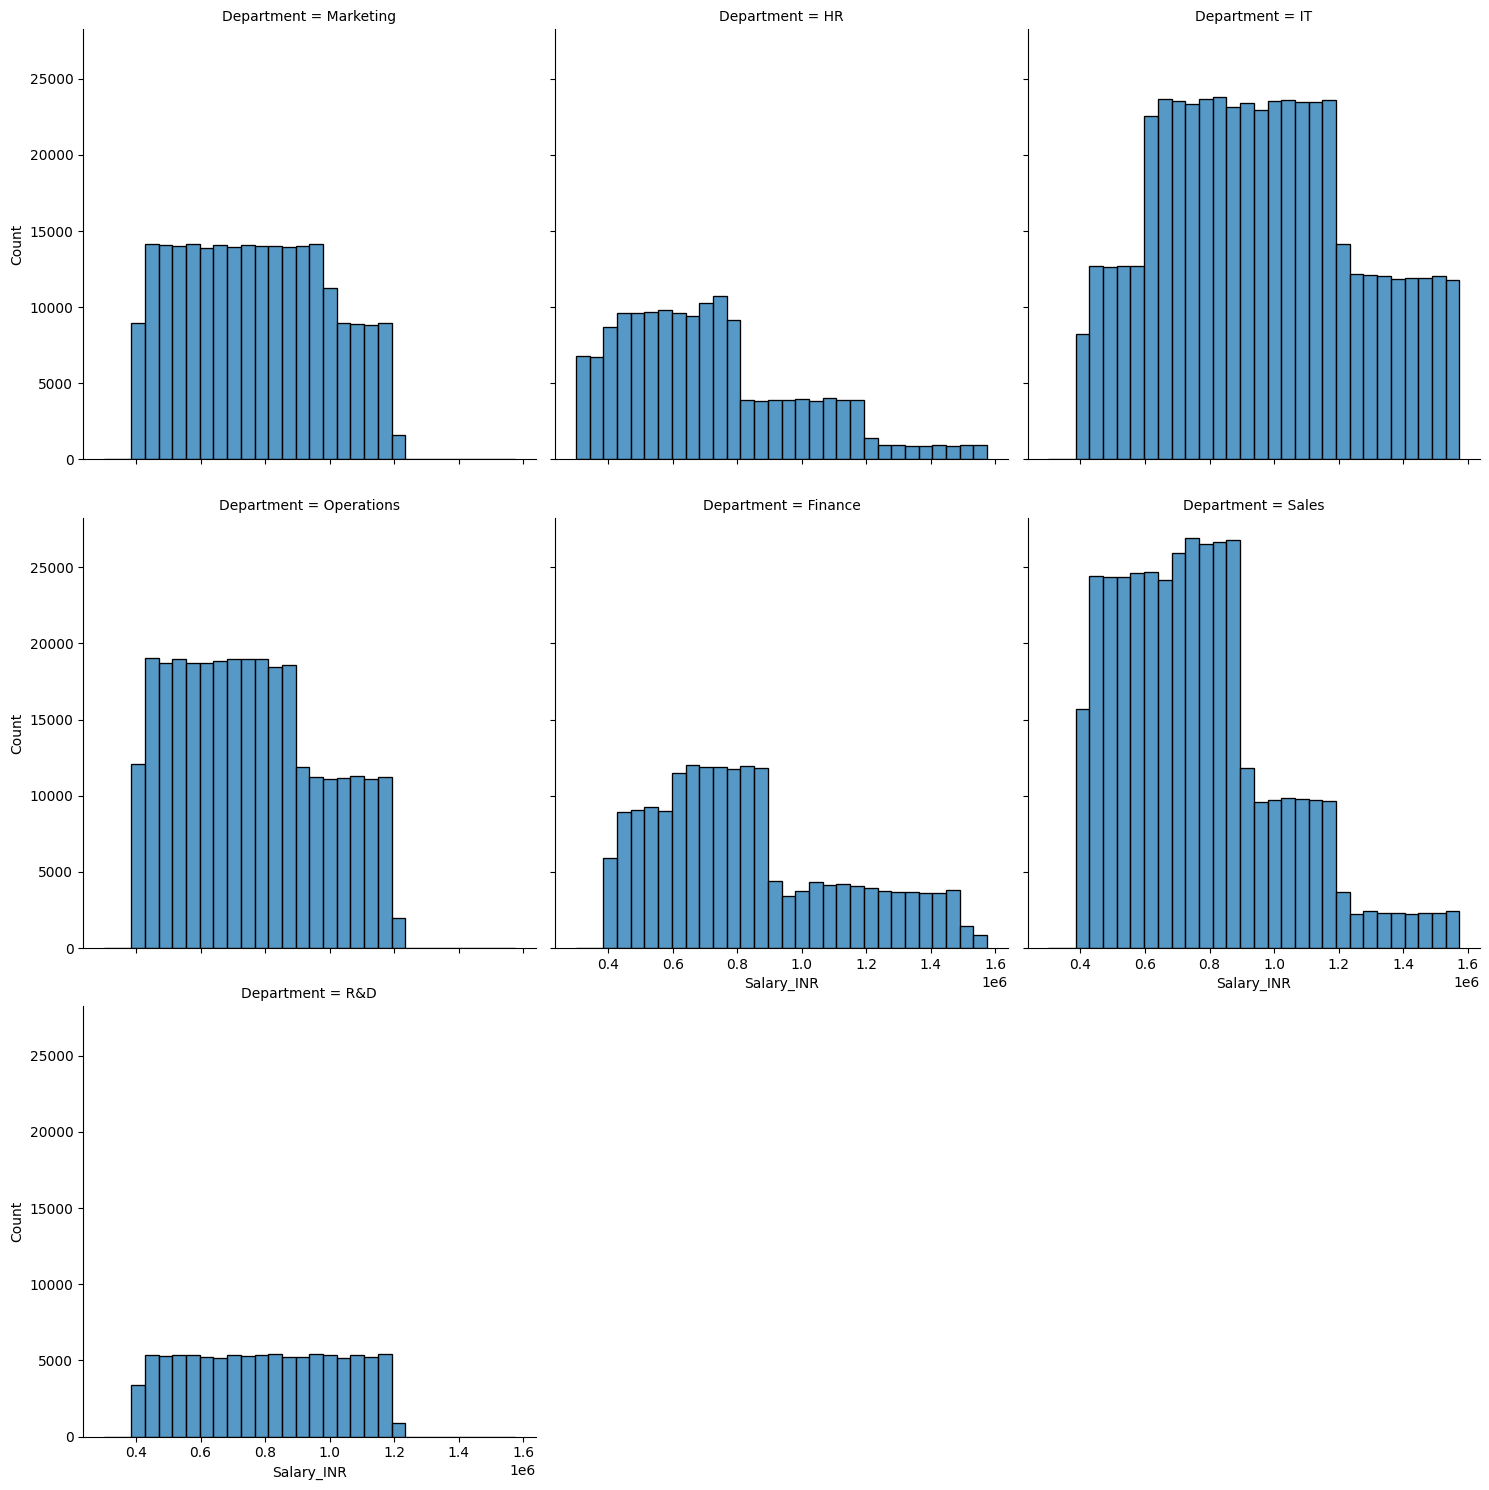

In [19]:
sns.displot(data=df_splot, x="Salary_INR", col="Department", col_wrap=3, kind="hist", bins=30)